In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset
df = pd.read_csv('combined_dataset.csv')  # Assuming this is the file you have


In [3]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
df['Mental_Health_Status'] = df['Mental_Health_Status'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3})
df['Support_Systems_Access'] = df['Support_Systems_Access'].map({'No': 0, 'Yes': 1})
df['Work_Environment_Impact'] = df['Work_Environment_Impact'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
df['Online_Support_Usage'] = df['Online_Support_Usage'].map({'No': 0, 'Yes': 1})

# Define features and target
X = df[['Age', 'Gender', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
        'Screen_Time_Hours', 'Mental_Health_Status', 'Sleep_Hours', 'Physical_Activity_Hours',
        'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage',
        'Humidity', 'Temperature', 'Step_count']]
y = df['Stress_Level'] > 1  # 1 for stressed, 0 for not stressed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Feature ranking:
1. Feature 14 (0.36200152403465397)
2. Feature 13 (0.32112668273103856)
3. Feature 12 (0.3114733877290651)
4. Feature 2 (0.0009502240717723842)
5. Feature 4 (0.0009343748461272426)
6. Feature 3 (0.0007753915662547728)
7. Feature 5 (0.0007400216687598682)
8. Feature 8 (0.0006760423254922163)
9. Feature 7 (0.0005232360208074832)
10. Feature 0 (0.00034376861935275056)
11. Feature 6 (0.00014929999805229273)
12. Feature 10 (0.00014257372536057448)
13. Feature 1 (7.111406807992841e-05)
14. Feature 11 (5.263557495574667e-05)
15. Feature 9 (3.972302022715472e-05)


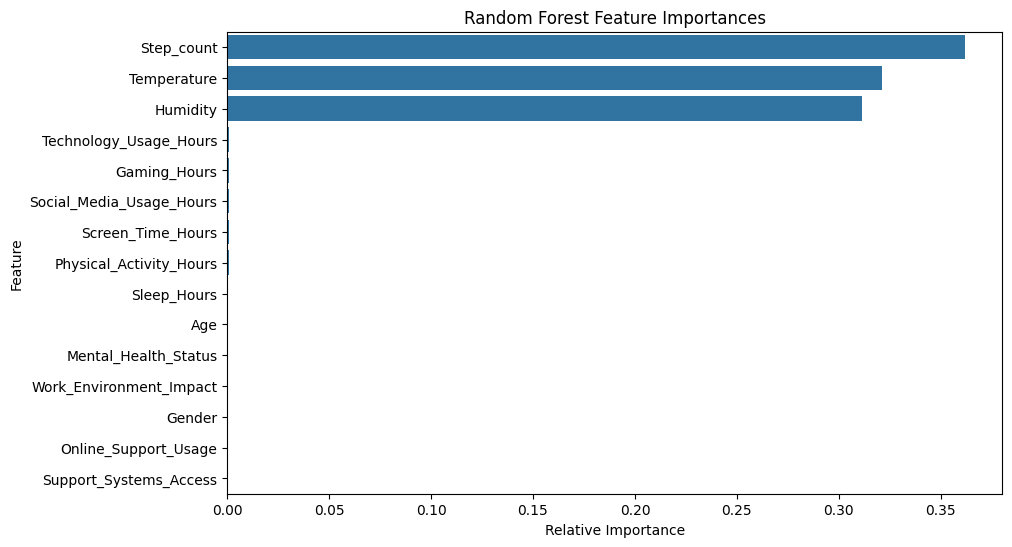

In [4]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature rankings
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


XGBoost Feature ranking:
1. Feature 12 (1.0)
2. Feature 14 (0.0)
3. Feature 13 (0.0)
4. Feature 11 (0.0)
5. Feature 10 (0.0)
6. Feature 9 (0.0)
7. Feature 8 (0.0)
8. Feature 7 (0.0)
9. Feature 6 (0.0)
10. Feature 5 (0.0)
11. Feature 4 (0.0)
12. Feature 3 (0.0)
13. Feature 2 (0.0)
14. Feature 1 (0.0)
15. Feature 0 (0.0)


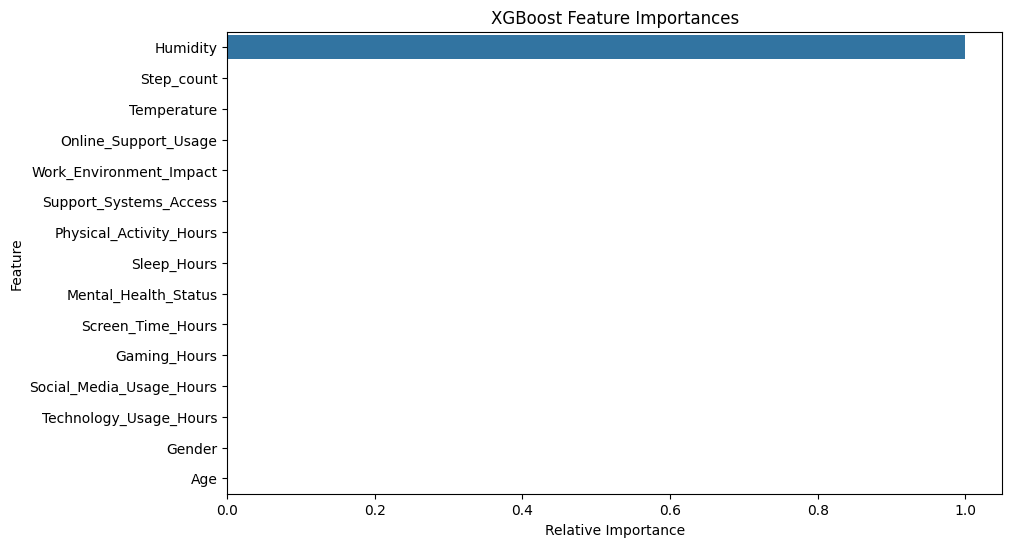

In [5]:
# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

# Print feature rankings
print("XGBoost Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {xgb_indices[f]} ({xgb_importances[xgb_indices[f]]})")

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances[xgb_indices], y=[X.columns[i] for i in xgb_indices])
plt.title('XGBoost Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


In [6]:
import joblib

# Save the Random Forest model to a .pkl file
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as random_forest_model.pkl")


Random Forest model saved as random_forest_model.pkl


In [7]:
# Save the XGBoost model to a .pkl file
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("XGBoost model saved as xgboost_model.pkl")


XGBoost model saved as xgboost_model.pkl


In [9]:
from keras.models import Sequential
from keras.layers import Dense

# Define a sample model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5800 - loss: 7.6503
Epoch 2/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9965 - loss: 0.0284
Epoch 3/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0079
Epoch 4/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 5/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 6/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 7/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 8/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.5517e-04
Epoch 9/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.9495e-04
Epoch 10/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.6672e-04


In [10]:
# Save the Keras model to a .h5 file
model.save('keras_model.h5')
print("Keras model saved as keras_model.h5")


Keras model saved as keras_model.h5


In [11]:
from keras.models import load_model

# Load the saved Keras model
loaded_model = load_model('keras_model.h5')

# Test a sample prediction
sample_prediction = loaded_model.predict(X_test)
print("Keras sample prediction:", sample_prediction[:5])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Keras sample prediction: [[2.7225140e-04]
 [4.5513392e-05]
 [5.5581116e-04]
 [9.9992591e-01]
 [4.1533720e-05]]


In [14]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset and preprocess
df = pd.read_csv('combined_dataset.csv')
feature_names = ['Age', 'Gender', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
                 'Screen_Time_Hours', 'Mental_Health_Status', 'Sleep_Hours', 'Physical_Activity_Hours',
                 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage',
                 'Humidity', 'Temperature', 'Step_count']

# Define inputs
sample_input_stressed = {
    'Age': 30,
    'Gender': 1,  # Male
    'Technology_Usage_Hours': 10.0,
    'Social_Media_Usage_Hours': 8.0,
    'Gaming_Hours': 3.0,
    'Screen_Time_Hours': 12.0,
    'Mental_Health_Status': 1,
    'Sleep_Hours': 4.0,
    'Physical_Activity_Hours': 1.0,
    'Support_Systems_Access': 0,
    'Work_Environment_Impact': 0,
    'Online_Support_Usage': 0,
    'Humidity': 80.0,
    'Temperature': 95.0,
    'Step_count': 2000
}

sample_input_not_stressed = {
    'Age': 30,
    'Gender': 1,  # Male
    'Technology_Usage_Hours': 1.0,
    'Social_Media_Usage_Hours': 0.5,
    'Gaming_Hours': 0.2,
    'Screen_Time_Hours': 4.0,
    'Mental_Health_Status': 3,
    'Sleep_Hours': 9.0,
    'Physical_Activity_Hours': 8.0,
    'Support_Systems_Access': 1,
    'Work_Environment_Impact': 2,
    'Online_Support_Usage': 1,
    'Humidity': 35.0,
    'Temperature': 65.0,
    'Step_count': 12000
}

sample_df_stressed = pd.DataFrame([sample_input_stressed], columns=feature_names)
sample_df_not_stressed = pd.DataFrame([sample_input_not_stressed], columns=feature_names)

# Scaling
scaler = StandardScaler().fit(X_train)
sample_array_scaled_stressed = scaler.transform(sample_df_stressed)
sample_array_scaled_not_stressed = scaler.transform(sample_df_not_stressed)

# Load Random Forest model
rf_model = joblib.load('random_forest_model.pkl')

# Ensure Random Forest receives feature names
sample_array_scaled_stressed = pd.DataFrame(sample_array_scaled_stressed, columns=feature_names)
sample_array_scaled_not_stressed = pd.DataFrame(sample_array_scaled_not_stressed, columns=feature_names)

# Predict stress level
prediction_rf_stressed = rf_model.predict(sample_array_scaled_stressed)
prediction_rf_not_stressed = rf_model.predict(sample_array_scaled_not_stressed)

# Output results
stress_status_rf_stressed = 'Stressed' if prediction_rf_stressed[0] else 'Not Stressed'
stress_status_rf_not_stressed = 'Stressed' if prediction_rf_not_stressed[0] else 'Not Stressed'
print(f'Random Forest Prediction (Stressed Input): {stress_status_rf_stressed}')
print(f'Random Forest Prediction (Not Stressed Input): {stress_status_rf_not_stressed}')


Random Forest Prediction (Stressed Input): Not Stressed
Random Forest Prediction (Not Stressed Input): Not Stressed


In [15]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense

# Ensure the Keras model is compiled
loaded_model = load_model('keras_model.h5')
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Scaling
sample_array_scaled_stressed = scaler.transform(sample_df_stressed)
sample_array_scaled_not_stressed = scaler.transform(sample_df_not_stressed)

# Predict stress level
prediction_keras_stressed = loaded_model.predict(sample_array_scaled_stressed)
prediction_keras_not_stressed = loaded_model.predict(sample_array_scaled_not_stressed)

# Output results
stress_status_keras_stressed = 'Stressed' if np.argmax(prediction_keras_stressed, axis=1)[0] else 'Not Stressed'
stress_status_keras_not_stressed = 'Stressed' if np.argmax(prediction_keras_not_stressed, axis=1)[0] else 'Not Stressed'
print(f'Keras Prediction (Stressed Input): {stress_status_keras_stressed}')
print(f'Keras Prediction (Not Stressed Input): {stress_status_keras_not_stressed}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Keras Prediction (Stressed Input): Not Stressed
Keras Prediction (Not Stressed Input): Not Stressed


In [16]:
# Check the balance of the dataset
print(df['Stress_Level'].value_counts())


Stress_Level
2    3338
1    3332
Name: count, dtype: int64


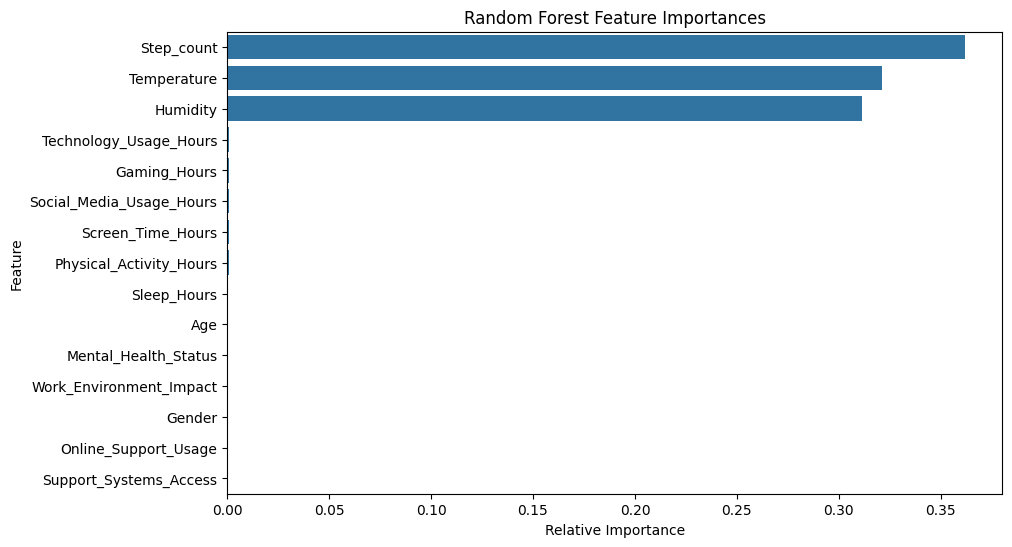

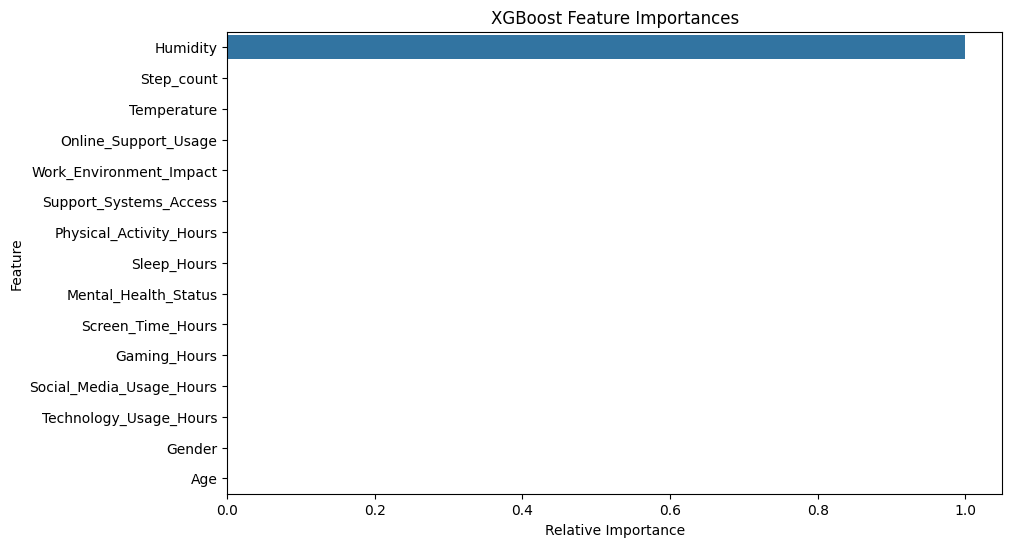

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

# If using XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances[xgb_indices], y=[X.columns[i] for i in xgb_indices])
plt.title('XGBoost Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

# Ensure consistent scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example scaling during prediction
sample_array_scaled_stressed = scaler.transform(sample_df_stressed)
sample_array_scaled_not_stressed = scaler.transform(sample_df_not_stressed)


In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Best parameters and estimator
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

best_rf_model = grid_search_rf.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
407 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Best parameters and estimator
best_params_xgb = grid_search_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)

best_xgb_model = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
